# Bank Loan modelling

Context:Companies use data to predict future events such as payment defaults.  In the banking sector, it is crucial to identify at risk in order to minimise losses related to unpaid loans. This project aims to create a classification model that predicts the probability.

The dataset is availabele on kaggle: https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

Objectives: Create predictive models.
Compare the performance of different classification models.

Issues: Which customers are at risk of defaulting on their loans?


In [1]:
import pandas as pd
data=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# I-Data cleaning and exploration

## 1-Data cleaning

In [2]:
#Shape of the dtaset
shape=data.shape
print('Our dataset has',shape[0],' rows and',shape[1], 'columns')

Our dataset has 5000  rows and 14 columns


In [3]:
#Data types of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### a-Duplicates

In [4]:
# Checking for dupliactes
duplicates=data[data.duplicated]
duplicates

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


We do not have any duplicate values in our dataset

### b-Missing values

In [5]:
#Checking for missing values
missings_counts=(data.isnull().sum()).sort_values(ascending=False)
print (missings_counts)

missings_prop=data.isnull().sum()/len(data)
missings_prop.sort_values(ascending=False)

missing_table=pd.concat([missings_counts,missings_prop],axis=1)
missing_table.columns = ['Count of missing values', 'Proportion of missing values']

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


We don't have any missing values in our dataset

### c-Features ingineering

There are some columns, we need to transform to have a better understanding of our data set

In [6]:
# Tranforming the education variable

data['Education']=data['Education'].astype('category')
data['Education']=data['Education'].cat.rename_categories({1: 'Undergraduate', 2:'Graduate', 3:'Advanced'})
data['Education']=data['Education'].astype('object')
data["Education"].unique()

array(['Undergraduate', 'Graduate', 'Advanced'], dtype=object)

In [7]:
# Tranforming the "Personal loan variable": Did this customer accept the personal loan offered in the last campaign
#data["Personal Loan"].unique()

data["Personal Loan"]=data["Personal Loan"].astype('category')
data["Personal Loan"]=data["Personal Loan"].cat.rename_categories({0:"No", 1:"Yes"})
data["Personal Loan"]=data["Personal Loan"].astype('object')
data["Personal Loan"].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
#Transforming the "Securities Account" variable: Does the customer have a securities account with the bank?

data["Securities Account"]=data["Securities Account"].astype('category')
data["Securities Account"]=data["Securities Account"].cat.rename_categories({0:"No", 1:"Yes"})
data["Securities Account"]=data["Securities Account"].astype('object')
data["Securities Account"].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
#Transforming the "CD account" variable: Does the customer have a certificate of deposit (CD) account with the bank
data["CD Account"]=data["CD Account"].astype('category')
data["CD Account"]=data["CD Account"].cat.rename_categories({0:"No", 1:"Yes"})
data["CD Account"]=data["CD Account"].astype('object')
data["CD Account"].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
#Transforming the "online" variable: Does the customer use internet banking facilities
data['Online']=data['Online'].astype('category')
data['Online']=data['Online'].cat.rename_categories({0:"No", 1:"Yes"})
data['Online']=data['Online'].astype('object')
data["Online"].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
# Transforming the "CreditCard" variable: Does the customer uses a credit card issued by UniversalBank
data['CreditCard']=data['CreditCard'].astype('category')
data['CreditCard']=data['CreditCard'].cat.rename_categories({0:"No", 1:"Yes"})
data['CreditCard']=data['CreditCard'].astype('object')
data["CreditCard"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergraduate,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Undergraduate,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Undergraduate,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Graduate,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Graduate,0,No,No,No,No,Yes


## 2-Data exploration and descriptive analysis

### a-Univariate analysis for numerical columns

In [13]:
#Summary statistics

data_num=data.select_dtypes(include='number')
from tabulate import tabulate
summary=data_num.describe()
print('Summary statistics\n',tabulate(summary, headers='keys', tablefmt='fancy_grid', numalign="center"))

Summary statistics
 ╒═══════╤═════════╤═════════╤══════════════╤══════════╤════════════╤══════════╤═════════╤════════════╕
│       │   ID    │   Age   │  Experience  │  Income  │  ZIP Code  │  Family  │  CCAvg  │  Mortgage  │
╞═══════╪═════════╪═════════╪══════════════╪══════════╪════════════╪══════════╪═════════╪════════════╡
│ count │  5000   │  5000   │     5000     │   5000   │    5000    │   5000   │  5000   │    5000    │
├───────┼─────────┼─────────┼──────────────┼──────────┼────────────┼──────────┼─────────┼────────────┤
│ mean  │ 2500.5  │ 45.3384 │   20.1046    │ 73.7742  │  93152.5   │  2.3964  │ 1.93791 │  56.4988   │
├───────┼─────────┼─────────┼──────────────┼──────────┼────────────┼──────────┼─────────┼────────────┤
│ std   │ 1443.52 │ 11.4632 │    11.468    │ 46.0337  │  2121.85   │ 1.14766  │ 1.74767 │  101.714   │
├───────┼─────────┼─────────┼──────────────┼──────────┼────────────┼──────────┼─────────┼────────────┤
│ min   │    1    │   23    │      -3      │    8    

ID


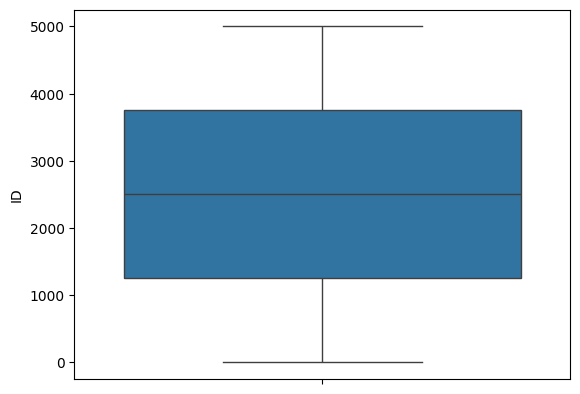

Age


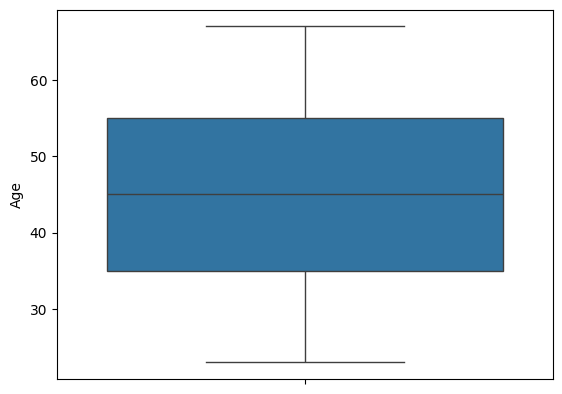

Experience


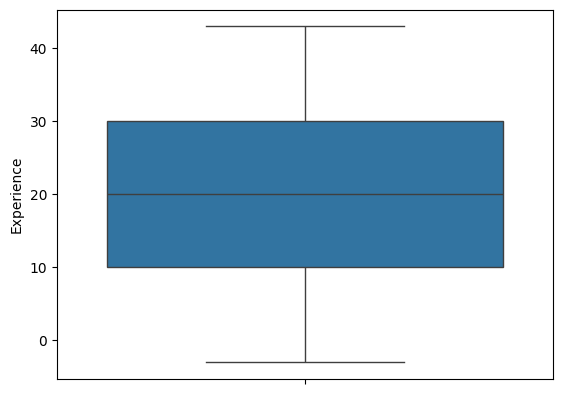

Income


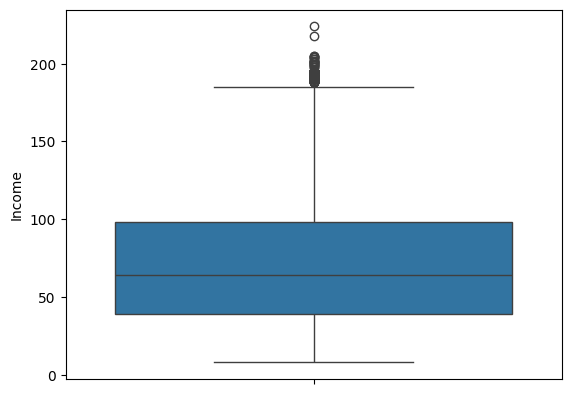

ZIP Code


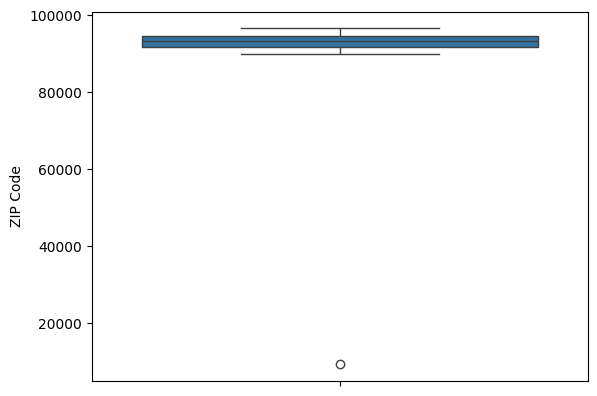

Family


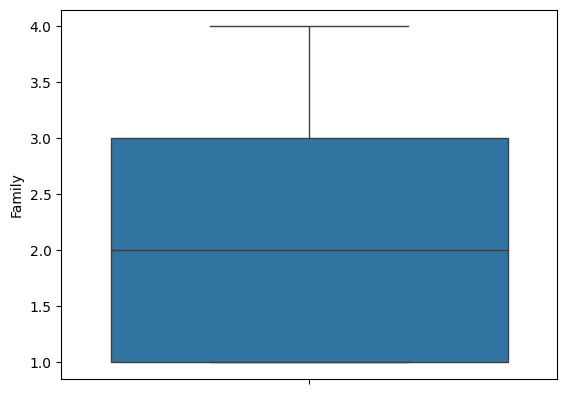

CCAvg


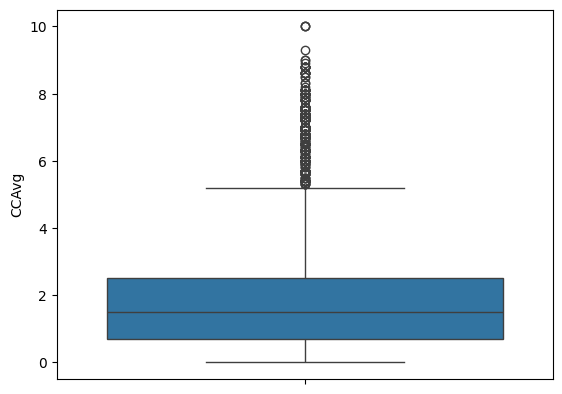

Mortgage


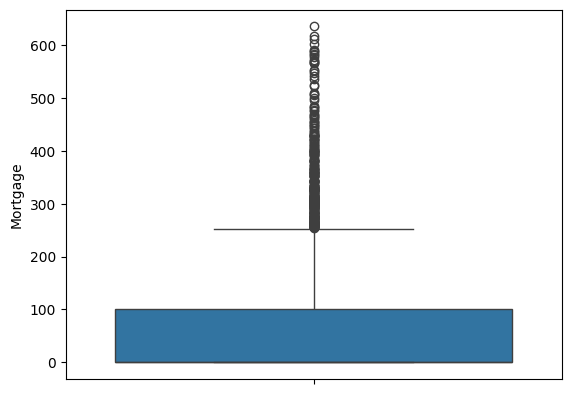

In [14]:
# Box plots of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
for var in data_num:
    print(var)
    sns.boxplot(y=var, data=data_num)
    plt.show()

ID


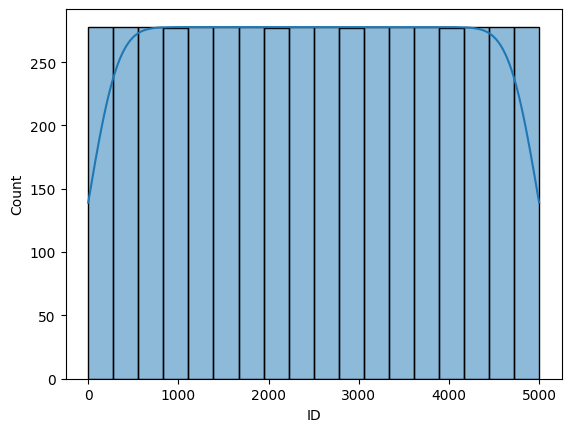

Age


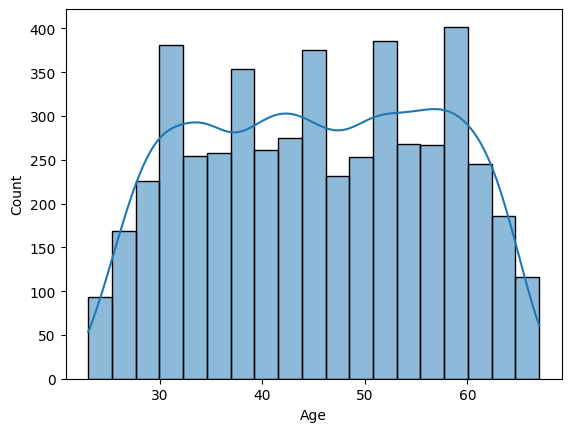

Experience


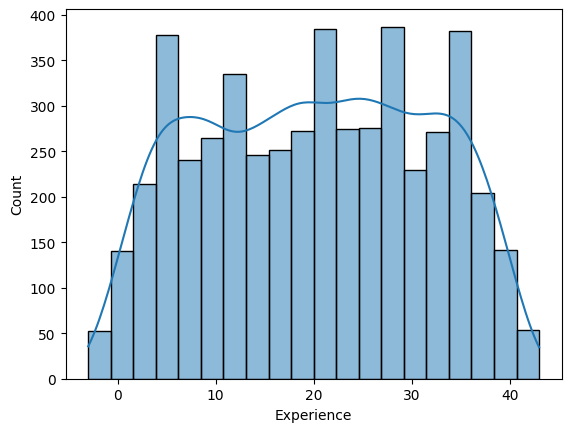

Income


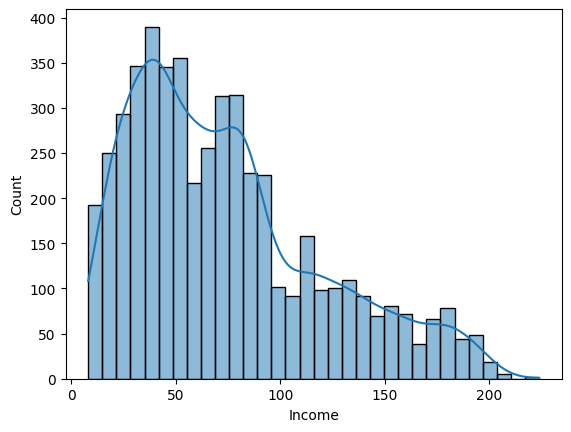

ZIP Code


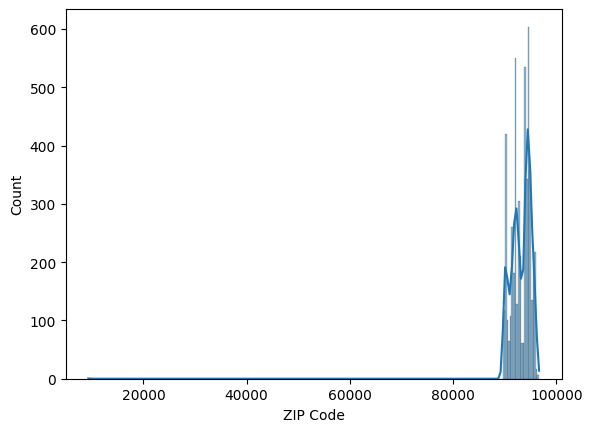

Family


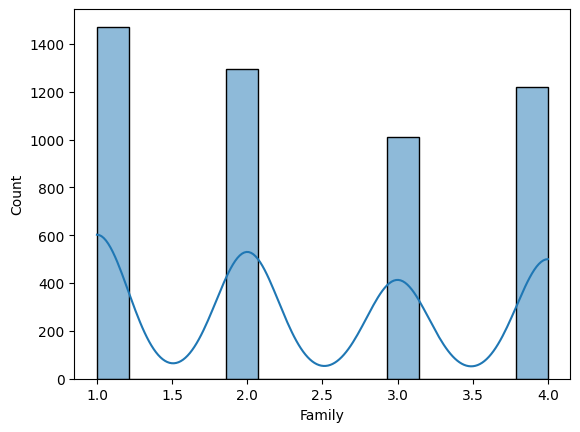

CCAvg


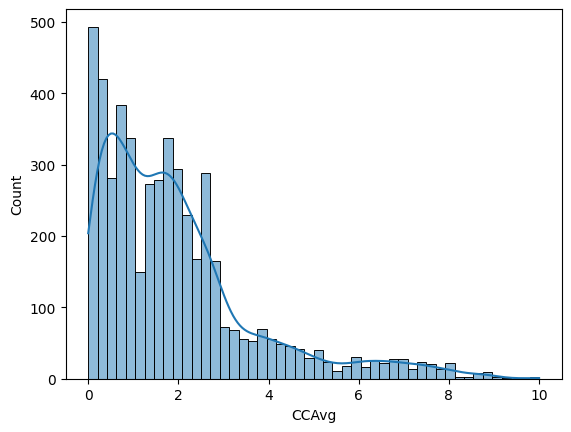

Mortgage


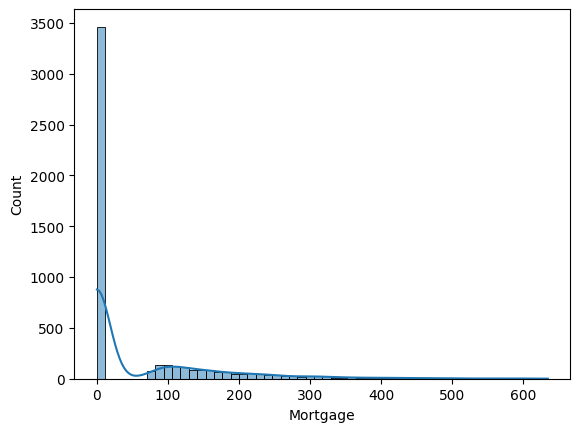

In [15]:
# Histogram of numerical features
for var in data_num:
    print (var)
    sns.histplot(x=var, data=data_num, kde=True)
    plt.show()

In [16]:
# Normality test for each variable with the shapiro wilk test
from scipy.stats import shapiro
normality_results = []
for var in data_num:
    stat, p=shapiro(data_num[var])
    normality_results.append({'Variable': var, 'Statistic': stat, 'p_value': p})
    
table=pd.DataFrame(normality_results)
print(table)

     Variable  Statistic       p_value
0          ID   0.954906  9.412678e-37
1         Age   0.961863  2.262675e-34
2  Experience   0.964742  2.760857e-33
3      Income   0.928240  8.631808e-44
4    ZIP Code   0.694891  7.825118e-70
5      Family   0.843593  4.922024e-57
6       CCAvg   0.847255  1.322794e-56
7    Mortgage   0.628195  7.107316e-74


### b-Univariate analysis for categorical columns

In [17]:
#Select categorical columns
data_cat=data.select_dtypes(include='object')
data_cat.describe(include='all')

,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000
unique,3,2,2,2,2,2
top,Undergraduate,No,No,No,Yes,No
freq,2096,4520,4478,4698,2984,3530


In [18]:
# Description of our target variable
data_cat['Personal Loan'].value_counts()

Personal Loan
No     4520
Yes     480
Name: count, dtype: int64

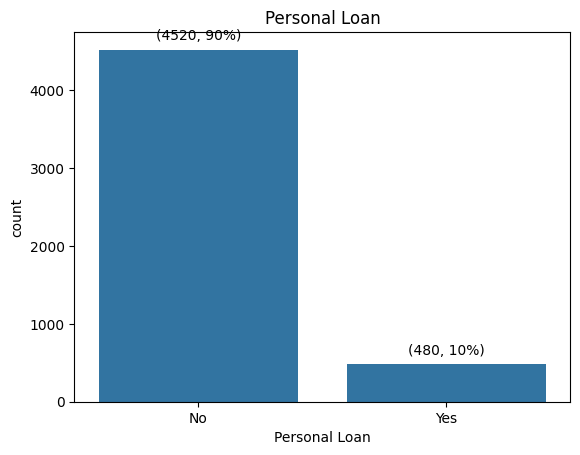

In [19]:
#Bar graph with the Count and percentage of the personal loan

prop_df = data_cat["Personal Loan"].value_counts(normalize=True).reset_index()
prop_df.columns = ["Personal Loan", "proportion"]

ax = sns.countplot(x="Personal Loan", data=data_cat)
plt.title("Personal Loan")

for p, prop, count in zip(ax.patches, prop_df["proportion"], data_cat["Personal Loan"].value_counts().sort_index()):
    ax.annotate(f'({count}, {prop:.0%})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

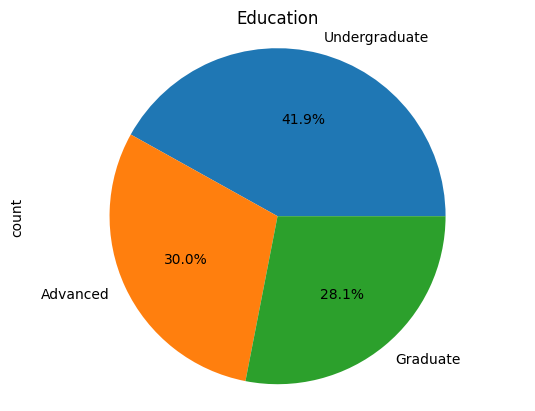

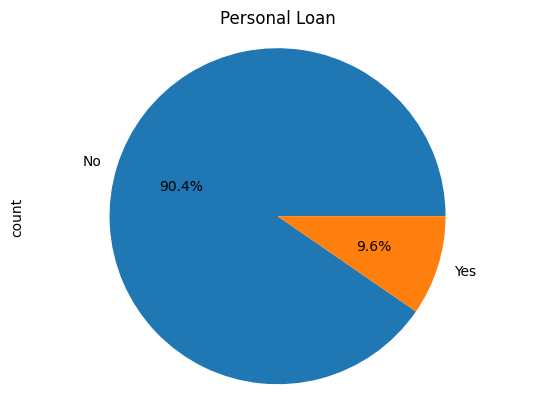

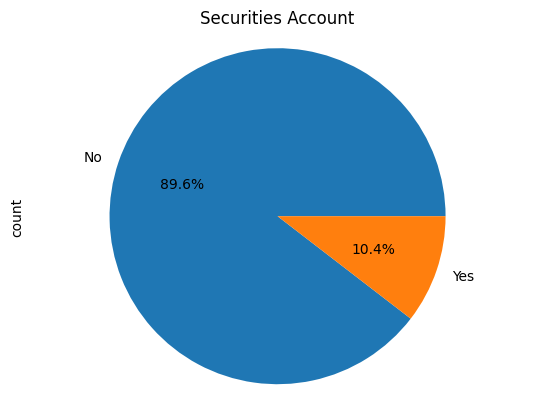

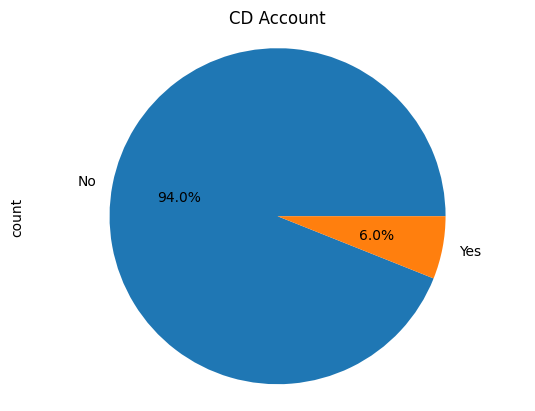

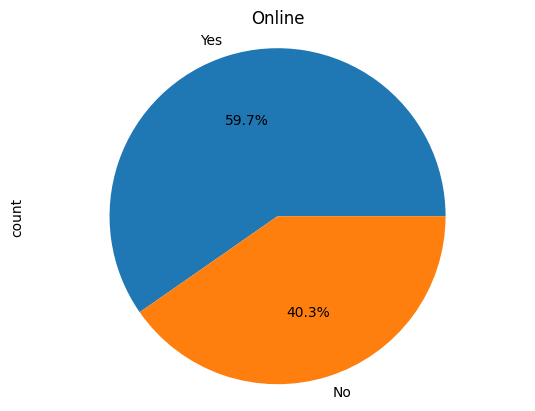

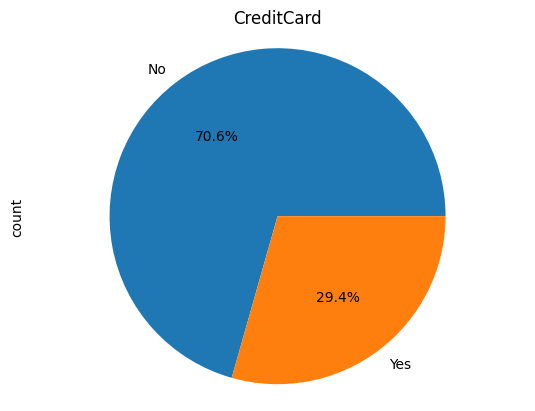

In [20]:
# Pie chart of each categorical column
for var in data_cat:
    data_cat[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

### c-Bivariate analysis for numerical columns

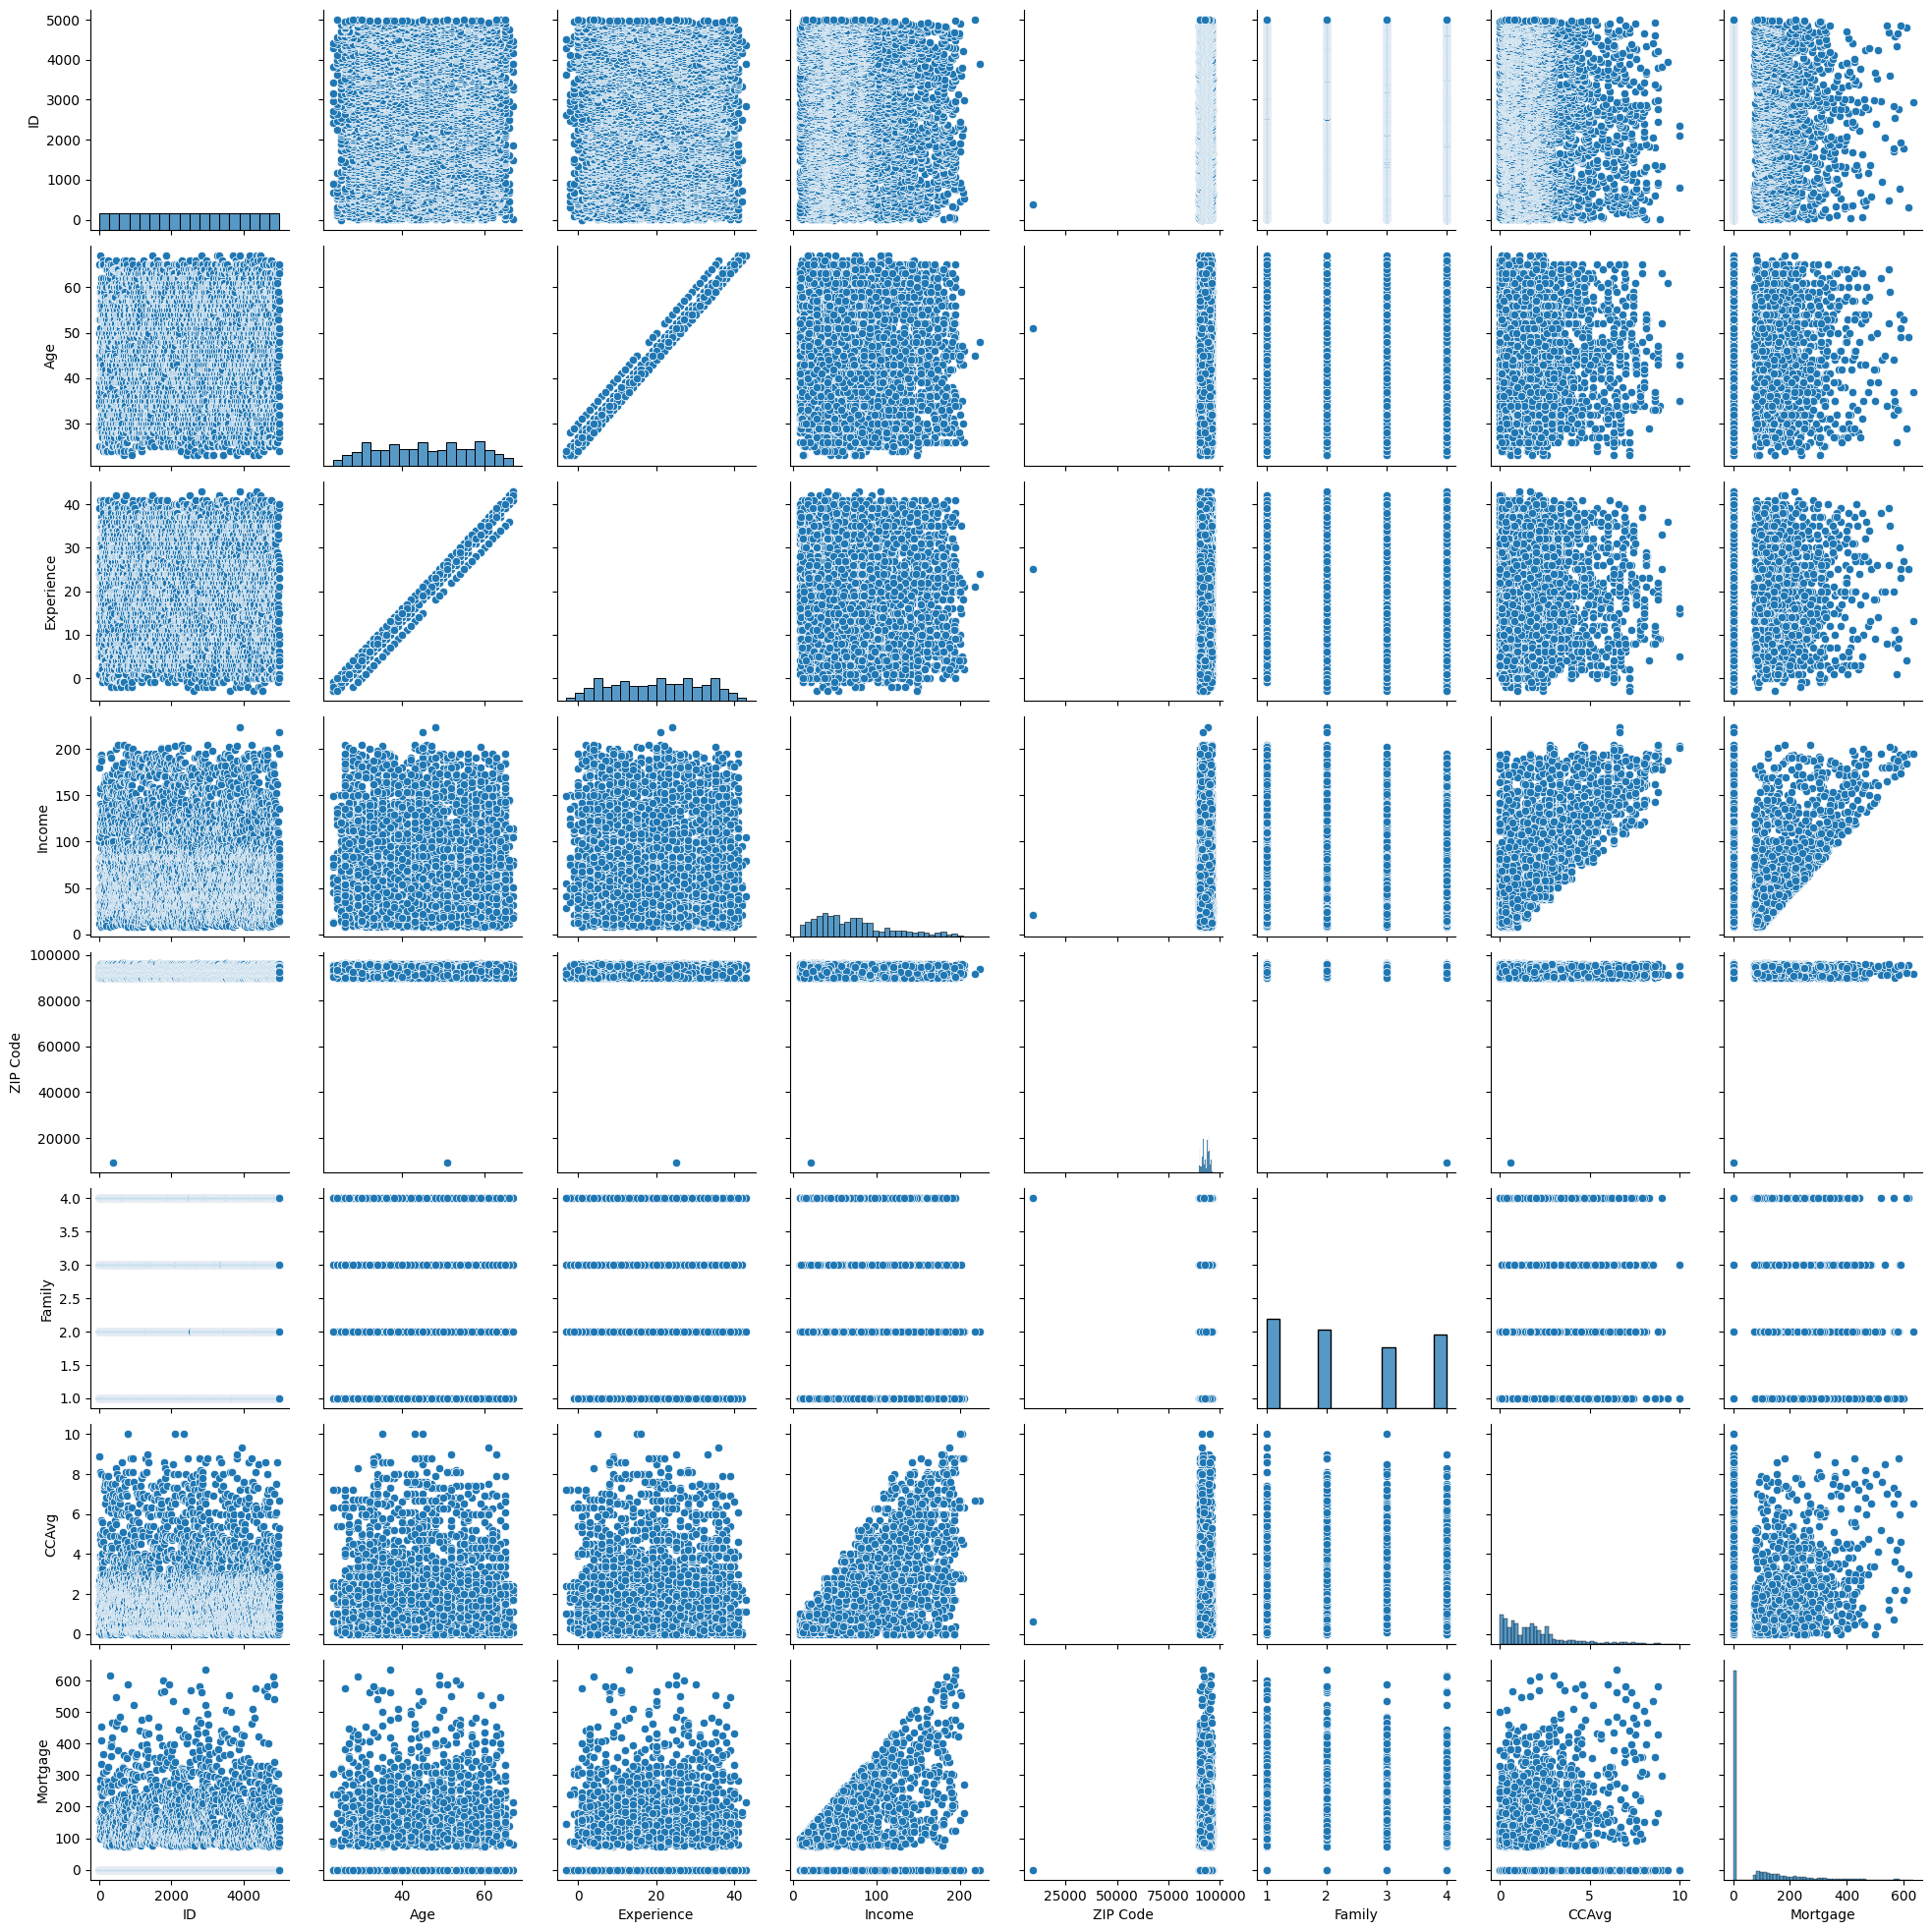

In [21]:
#Pairplot of numerical columns
sns.pairplot(data_num,kind="scatter")

<Axes: >

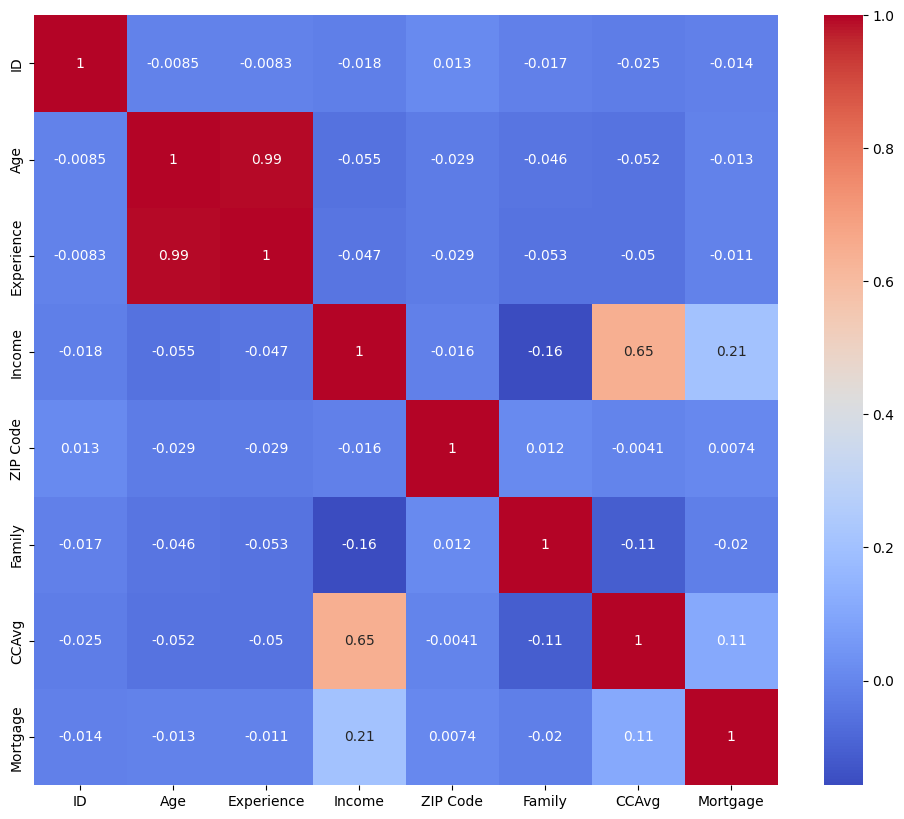

In [21]:
#Correlation matrix
corr_matrix = data_num.corr()

plt.figure(figsize=(12, 10))
# Display the as heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

### d-Bivariate analysis for categorical columns

In [22]:
from scipy.stats import chi2_contingency

#1-Contingency table between personal loan and performance score
contingency_table = pd.crosstab(data_cat['Education'], data_cat['Personal Loan'])
print('Personal loan by education\n', tabulate(contingency_table, headers='keys', tablefmt='fancy_grid', numalign="center"))

# Chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
# Show the results
print("chi-quare statistic :", chi2_stat)
print("P-value :", p_value)
print("Degree of ffreedom :", dof)
print("expected frequencies :\n", expected_freq)

#2-Contingency table between personal loan and securities account
contingency_table2 = pd.crosstab(data_cat['Securities Account'], data_cat['Personal Loan'])
print('Personal loan by Securities Account\n', tabulate(contingency_table2, headers='keys', tablefmt='fancy_grid', numalign="center"))

# Chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table2)
# Show the results
print("chi-quare statistic :", chi2_stat)
print("P-value :", p_value)
print("Degree of ffreedom :", dof)
print("expected frequencies :\n", expected_freq)

#3-Contingency table between personal loan and CD Account
contingency_table3 = pd.crosstab(data_cat['Securities Account'], data_cat['Personal Loan'])
print('Personal loan by CD Account\n', tabulate(contingency_table3, headers='keys', tablefmt='fancy_grid', numalign="center"))

# Chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table3)
# Show the results
print("chi-quare statistic :", chi2_stat)
print("P-value :", p_value)
print("Degree of ffreedom :", dof)
print("expected frequencies :\n", expected_freq)

#4-Contingency table between personal loan and Online
contingency_table4 = pd.crosstab(data_cat['Online'], data_cat['Personal Loan'])
print('Personal loan by Online\n', tabulate(contingency_table4, headers='keys', tablefmt='fancy_grid', numalign="center"))

# Chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table4)
# Show the results
print("chi-quare statistic :", chi2_stat)
print("P-value :", p_value)
print("Degree of ffreedom :", dof)
print("expected frequencies :\n", expected_freq)

#5-Contingency table between personal loan and Online
contingency_table5 = pd.crosstab(data_cat['CreditCard'], data_cat['Personal Loan'])
print('Personal loan by CreditCard\n', tabulate(contingency_table5, headers='keys', tablefmt='fancy_grid', numalign="center"))

# Chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table5)
# Show the results
print("chi-quare statistic :", chi2_stat)
print("P-value :", p_value)
print("Degree of ffreedom :", dof)
print("expected frequencies :\n", expected_freq)

Personal loan by education
 ╒═══════════════╤══════╤═══════╕
│ Education     │  No  │  Yes  │
╞═══════════════╪══════╪═══════╡
│ Advanced      │ 1296 │  205  │
├───────────────┼──────┼───────┤
│ Graduate      │ 1221 │  182  │
├───────────────┼──────┼───────┤
│ Undergraduate │ 2003 │  93   │
╘═══════════════╧══════╧═══════╛
chi-quare statistic : 111.2398718738913
P-value : 6.991473868665428e-25
Degree of ffreedom : 2
expected frequencies :
 [[1356.904  144.096]
 [1268.312  134.688]
 [1894.784  201.216]]
Personal loan by Securities Account
 ╒══════════════════════╤══════╤═══════╕
│ Securities Account   │  No  │  Yes  │
╞══════════════════════╪══════╪═══════╡
│ No                   │ 4058 │  420  │
├──────────────────────┼──────┼───────┤
│ Yes                  │ 462  │  60   │
╘══════════════════════╧══════╧═══════╛
chi-quare statistic : 2.172310545186504
P-value : 0.14051497326319357
Degree of ffreedom : 1
expected frequencies :
 [[4048.112  429.888]
 [ 471.888   50.112]]
Personal loan b

Only the variable "Education" is statisticaly associated to "personal loan" 

### e-Bivariate analysis between personal loan and numerical columns

Based on the fact that there is not a numerical variable with a normal distribution, we will the Mann-Whitney U Test,

to study the association between "personal loan" and the numerical variables

In [23]:
#Association between "personal loan" and "numerical variables"

from scipy.stats import mannwhitneyu, kruskal

def perform_stat_test(data, categorical_var, continuous_vars):
    results = {}

    unique_groups = data[categorical_var].unique()
    
    if len(unique_groups) < 2:
        raise ValueError("Categorical variable must have at least two unique groups.")

    for var in continuous_vars:
        # Split data into groups
        groups = [data[data[categorical_var] == group][var] for group in unique_groups]

        # Perform appropriate statistical test
        if len(unique_groups) == 2:
            stat, p = mannwhitneyu(groups[0], groups[1])
            test_type = "Mann-Whitney U Test"
        else:
            stat, p = kruskal(*groups)
            test_type = "Kruskal-Wallis Test"

        results[var] = {"Test": test_type, "Statistic": stat, "P-value": p}

    return pd.DataFrame(results).T  # Convert dictionary to DataFrame for readability

# Example usage:
results_df = perform_stat_test(data, "Personal Loan", data_num.columns)
print(results_df)


                           Test  Statistic   P-value
ID          Mann-Whitney U Test  1137528.0  0.079514
Age         Mann-Whitney U Test  1102125.0  0.564396
Experience  Mann-Whitney U Test  1101601.5  0.576225
Income      Mann-Whitney U Test   169085.0       0.0
ZIP Code    Mann-Whitney U Test  1085171.0  0.990169
Family      Mann-Whitney U Test   957893.0  0.000013
CCAvg       Mann-Whitney U Test   417591.0       0.0
Mortgage    Mann-Whitney U Test   974814.5  0.000008


The personal loan is associated to "Income", "Family" and "Mortgage"

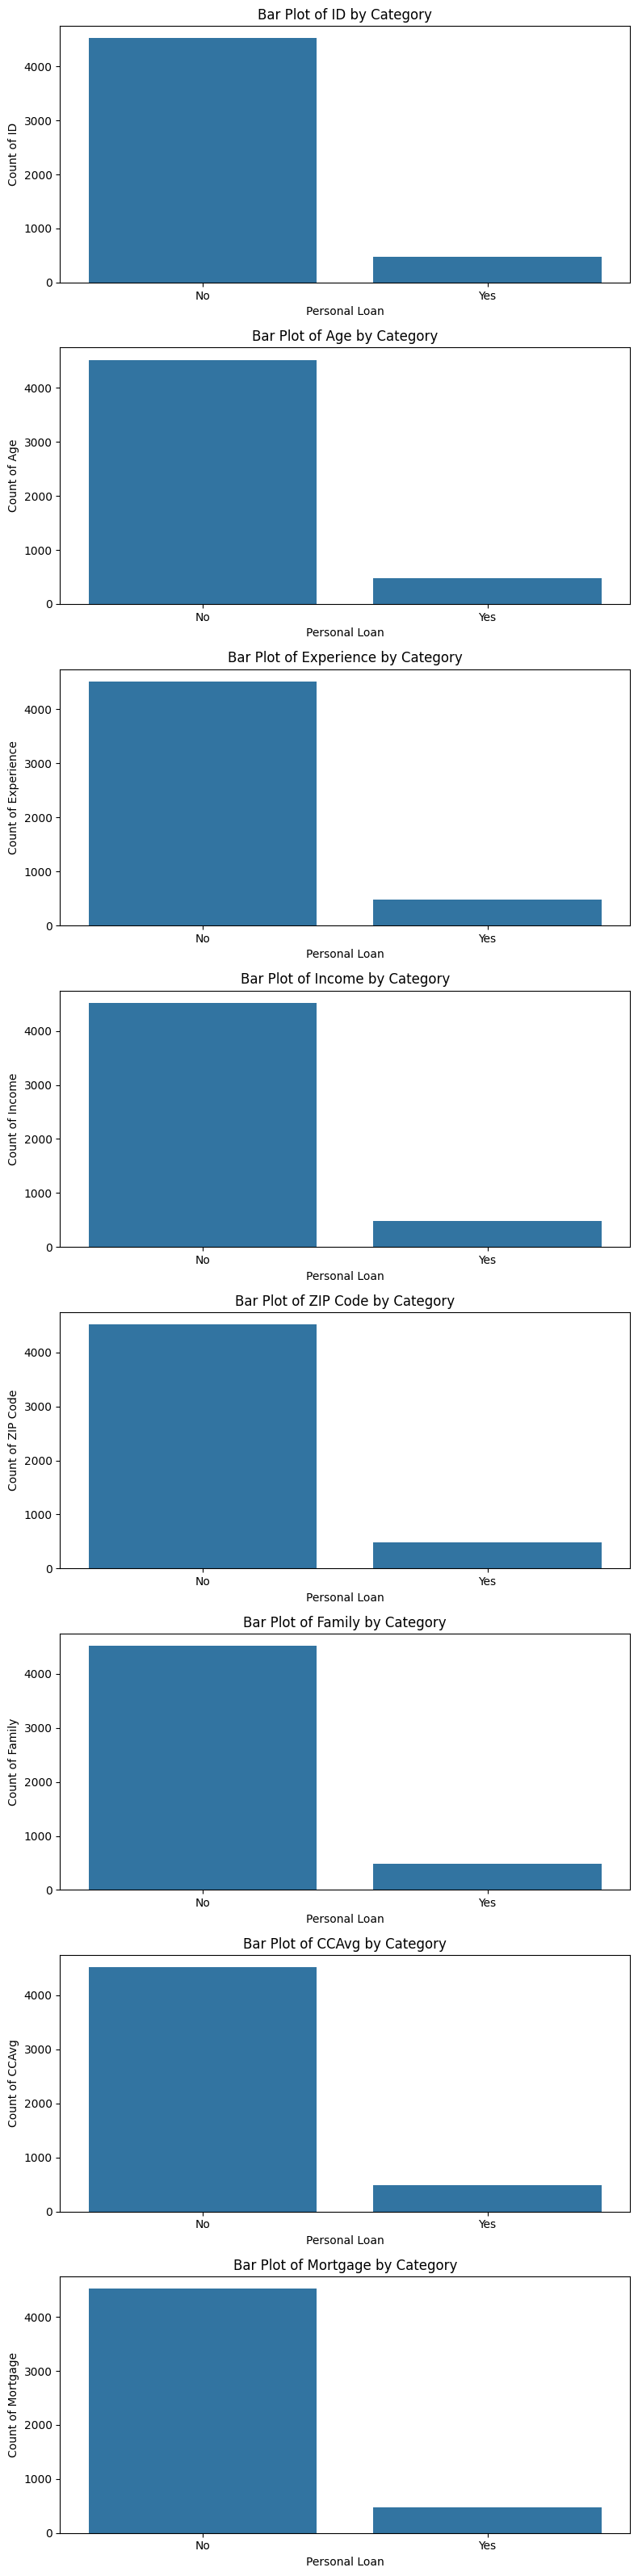

In [28]:
# Create multiple boxplots for each quantitative variable 
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=len(data_num.columns), figsize=(8, len(data_num.columns)*4))

for i, feature in enumerate(data_num.columns):
    sns.barplot(x=data_cat["Personal Loan"], y=data_num[feature], ax=axes[i], estimator=lambda x: len(x), errorbar=None)
    axes[i].set_title(f"Bar Plot of {feature} by Category")
    axes[i].set_xlabel("Personal Loan")
    axes[i].set_ylabel(f"Count of {feature}")

plt.tight_layout()
plt.show()


# 3-Variable selection and normalization

## 3.1-Features selection

Based on the fact that The personal loan was associated to "Income", "Family" and "Mortgage", we will include these variables in our machine learning 

model. But for selecting the others variables we can introduce in our model, we will use the Random Forest

In [40]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder

#Encoding categorical data with one hot encoding
cat_features=['Education', 'Securities Account', 'CD Account','Online','CreditCard']
encoder=OneHotEncoder(drop='first', handle_unknown="ignore")
encoded_cat = encoder.fit_transform(data[cat_features]).toarray()
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features))

# Add encoded categorical data to our dataset
df_final = data.drop(columns=cat_features).join(encoded_df)

#  Random Forest
X = df_final.drop(columns=["Personal Loan"])
y = df_final["Personal Loan"]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Features selection
selector = SelectFromModel(rf, prefit=True)
selected_features = X.columns[selector.get_support()]
print("Selected variables :", selected_features)

Selected variables : Index(['Income', 'Family', 'CCAvg', 'Education_Undergraduate'], dtype='object')


We will include 'Income', 'Family', 'CCAvg', 'Education_Undergraduate' in our model

In [72]:
data.reset_index()

,index,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,1,25,1,49,91107,4,1.6,Undergraduate,0,No,Yes,No,No,No
1,1,2,45,19,34,90089,3,1.5,Undergraduate,0,No,Yes,No,No,No
2,2,3,39,15,11,94720,1,1.0,Undergraduate,0,No,No,No,No,No
3,3,4,35,9,100,94112,1,2.7,Graduate,0,No,No,No,No,No
4,4,5,35,8,45,91330,4,1.0,Graduate,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,4996,29,3,40,92697,1,1.9,Advanced,0,No,No,No,Yes,No
4996,4996,4997,30,4,15,92037,4,0.4,Undergraduate,85,No,No,No,Yes,No
4997,4997,4998,63,39,24,93023,2,0.3,Advanced,0,No,No,No,No,No
4998,4998,4999,65,40,49,90034,3,0.5,Graduate,0,No,No,No,Yes,No


###  3.2 Standardization of our numerical variables and one hot encoding for categorical variables

We will use the standard scaler technique to standardize our numerical data

In [81]:
# Select numerical and categorical features
num_features = ['Income', 'Family', 'CCAvg']
cat_features = ['Education', 'Personal Loan']

# Standardize numerical columns
scaler = StandardScaler()
X_std = scaler.fit_transform(data[num_features])

# Convert standardized data back to DataFrame
X_std_df = pd.DataFrame(X_std, columns=num_features, index=data.index)
X_std_df

,Income,Family,CCAvg
0,-0.538229,1.397414,-0.193371
1,-0.864109,0.525991,-0.250595
2,-1.363793,-1.216855,-0.536720
3,0.569765,-1.216855,0.436103
4,-0.625130,1.397414,-0.536720
...,...,...,...
4995,-0.733757,-1.216855,-0.021696
4996,-1.276892,1.397414,-0.880069
4997,-1.081363,-0.345432,-0.937294
4998,-0.538229,0.525991,-0.822844


In [87]:
# Sélectionner les variables catégorielles sans les encoder
cat_features = ['Education', 'Personal Loan']
cat_df = data[cat_features]
# Vérifier que les index sont bien alignés
print(X_std_df.index.equals(cat_df.index))  # Doit retourner True

# Fusionner les données quantitatives et catégorielles
df_final = pd.concat([X_std_df, cat_df], axis=1)
print(df_final.head())  # Vérifier le résultat

True
     Income    Family     CCAvg      Education Personal Loan
0 -0.538229  1.397414 -0.193371  Undergraduate            No
1 -0.864109  0.525991 -0.250595  Undergraduate            No
2 -1.363793 -1.216855 -0.536720  Undergraduate            No
3  0.569765 -1.216855  0.436103       Graduate            No
4 -0.625130  1.397414 -0.536720       Graduate            No


# 4-Machine learning

## 4.1-Logistic regression

### a- First model without optimization

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Select correct columns
X = df_final[["Income", "Family", "CCAvg","Education"]]
y = df_final["Personal Loan"]
X

,Income,Family,CCAvg,Education
0,-0.538229,1.397414,-0.193371,Undergraduate
1,-0.864109,0.525991,-0.250595,Undergraduate
2,-1.363793,-1.216855,-0.536720,Undergraduate
3,0.569765,-1.216855,0.436103,Graduate
4,-0.625130,1.397414,-0.536720,Graduate
...,...,...,...,...
4995,-0.733757,-1.216855,-0.021696,Advanced
4996,-1.276892,1.397414,-0.880069,Undergraduate
4997,-1.081363,-0.345432,-0.937294,Advanced
4998,-0.538229,0.525991,-0.822844,Graduate


In [231]:
#Transform the categorical independant variable with one hot encoding
X=pd.get_dummies(X, columns=['Education'], drop_first=True)
X = pd.DataFrame(X)  # ✅ Explicitly enforce DataFrame format

#print(type(X))
X = X.astype(float)


In [232]:
# Convert target variable to numeric BEFORE training
y = data["Personal Loan"].map({'No': 0, 'Yes': 1}) 

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

# Predict on train and test set
y_train_pred = logit_model.predict(X_train)
y_test_pred = logit_model.predict(X_test)




In [233]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train set metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test set metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print("Train Set Metrics:")
print(f"Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1 Score: {train_f1:.2f}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1 Score: {test_f1:.2f}")


Train Set Metrics:
Accuracy: 0.95, Precision: 0.82, Recall: 0.60, F1 Score: 0.69

Test Set Metrics:
Accuracy: 0.96, Precision: 0.91, Recall: 0.70, F1 Score: 0.80


Accuracy is high (95%-96%):The model makes correct predictions most of the time. 

Precision is strong (82% train, 91% test): It correctly classifies positive cases with minimal false positives.

Recall is lower (60% train, 70% test): The model misses some positive cases (false negatives). 

F1 Score balances precision & recall 

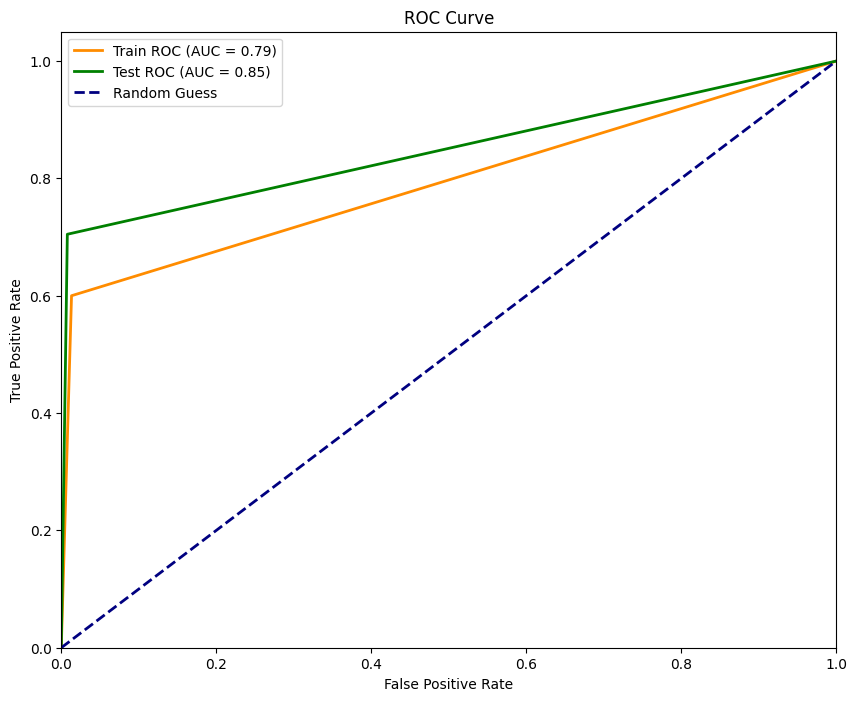

In [234]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Test ROC (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend() 
plt.show()


The AUC (0.85) is higher than our train AUC (0.79), which suggests that our model

is generalizing well to unseen data rather than overfitting.

### b-Logistic regression model by finding the best threshold

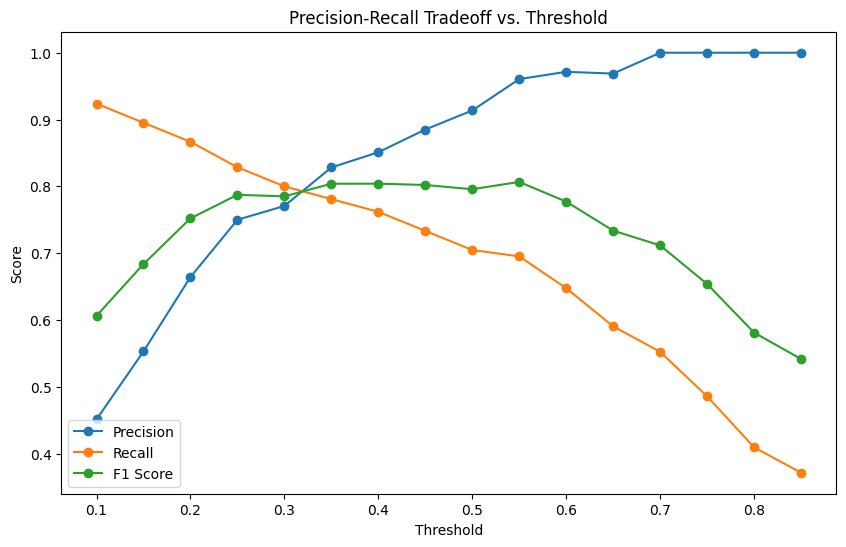

In [235]:
# Now we will try to find the best threshold
import numpy as np


# Predict probabilities
y_test_proba = logit_model.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Define threshold values
thresholds = np.arange(0.1, 0.9, 0.05)

# Store precision, recall, and f1 scores for each threshold
precisions, recalls, f1_scores = [], [], []

for threshold in thresholds:
    y_test_adjusted = (y_test_proba >= threshold).astype(int)  # Apply threshold
    precisions.append(precision_score(y_test, y_test_adjusted))
    recalls.append(recall_score(y_test, y_test_adjusted))
    f1_scores.append(f1_score(y_test, y_test_adjusted))

# Plot the metrics against threshold values
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision", marker="o")
plt.plot(thresholds, recalls, label="Recall", marker="o")
plt.plot(thresholds, f1_scores, label="F1 Score", marker="o")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff vs. Threshold")
plt.legend()
plt.show()


We will take the threshold that maximize f1 score: 0.55

In [236]:
# Predict probabilities
y_test_proba = logit_model.predict_proba(X_test)[:, 1]

# Best threshold
y_test_adjusted = (y_test_proba >= 0.55).astype(int)

# Évaluate the new model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_test_adjusted)
precision = precision_score(y_test, y_test_adjusted)
recall = recall_score(y_test, y_test_adjusted)
f1 = f1_score(y_test, y_test_adjusted)

# Display results
print(f"Optimized Accuracy: {accuracy:.2f}")
print(f"Optimized Precision: {precision:.2f}")
print(f"Optimized Recall: {recall:.2f}")
print(f"Optimized F1 Score: {f1:.2f}")


Optimized Accuracy: 0.96
Optimized Precision: 0.96
Optimized Recall: 0.70
Optimized F1 Score: 0.81


**Old metrics**:
*Train Set Metrics*:
Accuracy: 0.95, Precision: 0.82, Recall: 0.60, F1 Score: 0.69

*Test Set Metrics*:
Accuracy: 0.96, Precision: 0.91, Recall: 0.70, F1 Score: 0.80

This results shows us that with a probability hiher than 0.55, we can predict that a new person will be in "Personal Loan" == "yes"

In [237]:
# Saving the model
import joblib
joblib.dump(logit_model, "logistic_model.pkl")


['logistic_model.pkl']

## c-Deploy an API to use this model

In [261]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

model = joblib.load("logistic_model.pkl")

# Initialize Flask app
app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()  # Receive JSON data from request
    features = np.array(data["features"]).reshape(1, -1)  # Format for prediction

    prediction = model.predict(features)[0]  # Predict class
    probability = model.predict_proba(features)[0][1]  # Get probability

    return jsonify({"prediction": int(prediction), "probability": float(probability)})

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

## 4.2 Random Forest classification

#### a-First Random forest model without optimization

In [207]:
df_final

,Income,Family,CCAvg,Education,Personal Loan
0,-0.538229,1.397414,-0.193371,Undergraduate,No
1,-0.864109,0.525991,-0.250595,Undergraduate,No
2,-1.363793,-1.216855,-0.536720,Undergraduate,No
3,0.569765,-1.216855,0.436103,Graduate,No
4,-0.625130,1.397414,-0.536720,Graduate,No
...,...,...,...,...,...
4995,-0.733757,-1.216855,-0.021696,Advanced,No
4996,-1.276892,1.397414,-0.880069,Undergraduate,No
4997,-1.081363,-0.345432,-0.937294,Advanced,No
4998,-0.538229,0.525991,-0.822844,Graduate,No


In [241]:
y_train = y_train.to_numpy().ravel()  # Convert into NumPy array 1D
y_test = y_test.to_numpy().ravel()

In [242]:
from sklearn.ensemble import RandomForestClassifier

#Train the Random Forest Model
 
random_forest=RandomForestClassifier(oob_score=True)
random_forest.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [244]:
#Predictions on train and test set
y_train_pred=random_forest.predict(X_train)
y_test_pred=random_forest.predict(X_test)

In [249]:
# Model evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Performance table
performance_table = pd.DataFrame({
    'Metrics': ['Accuracy', 'AUC', 'Recall'],
    'train set': [train_accuracy, train_auc, train_recall],
    'test set': [test_accuracy, test_auc, test_recall]
})

# Display the table
print(performance_table)

    Metrics  train set  test set
0  Accuracy   0.999750  0.990000
1       AUC   0.998667  0.960787
2    Recall   0.997333  0.923810


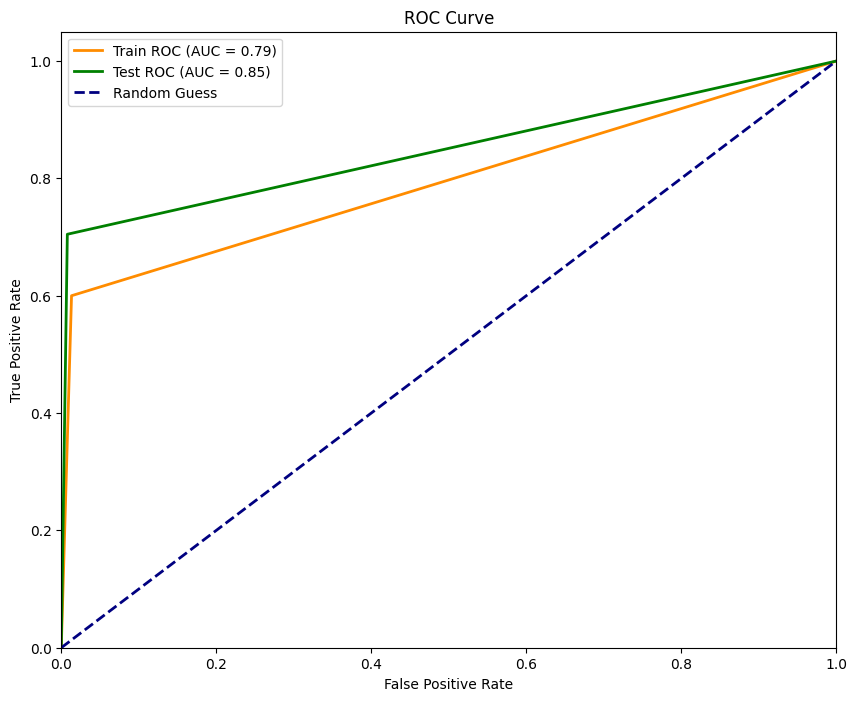

In [251]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Probabilities
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# (FPR) (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Test ROC (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend() 
plt.show()

#### b-Second random Forest with GridSearchcv

In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyper parameters to test
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# New model
rf = RandomForestClassifier(oob_score=True)

# Apply GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Meilleurs hyperparamètres:", grid_search.best_params_)


Meilleurs hyperparamètres : {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [256]:
#Predictions with the best parameters

best_rf = RandomForestClassifier(**grid_search.best_params_, oob_score=True)
best_rf.fit(X_train, y_train)

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Performance with new parameters
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score

print("Train Accuracy :", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))
print("Train AUC :", roc_auc_score(y_train, y_train_pred))
print("Test AUC :", roc_auc_score(y_test, y_test_pred))
print("Train Recall :", recall_score(y_train, y_train_pred))
print("Test Recall :", recall_score(y_test, y_test_pred))


Train Accuracy : 0.997
Test Accuracy : 0.99
Train AUC : 0.9863908045977012
Test AUC : 0.9607874434690078
Train Recall : 0.9733333333333334
Test Recall : 0.9238095238095239


We do not have a great difference between parameters with the second model but this random forest model is better than the logistic regression model


In [257]:
#Save our model

best_params = grid_search.best_params_  
best_rf = RandomForestClassifier(**best_params, oob_score=True)  
best_rf.fit(X_train, y_train)  

import joblib

joblib.dump(best_rf, "best_random_forest.pkl")

['best_random_forest.pkl']

#### c-Deploy an API for this model

In [260]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Load the saved Random Forest model
model = joblib.load("best_random_forest.pkl")

# Initialize Flask app
app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()  # Receive JSON data from request
    features = np.array(data["features"]).reshape(1, -1)  # Format for prediction

    prediction = model.predict(features)[0]  # Predict class
    probability = model.predict_proba(features)[0][1]  # Get probability

    return jsonify({"prediction": int(prediction), "probability": float(probability)})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\Yves-Ricky\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## 4.3-K Nearest Neighbours model

In [262]:
from sklearn.neighbors import KNeighborsClassifier

# k-values to test
k_values = list(range(1, 30))

# KNeighborsClassifier
knn = KNeighborsClassifier()

# Grid parameters
param_grid = {'n_neighbors': k_values}

# Cross validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Cross validation scores with k values
cv_scores = grid_search.cv_results_['mean_test_score']
best_k = grid_search.best_params_['n_neighbors']

In [263]:
best_k

1

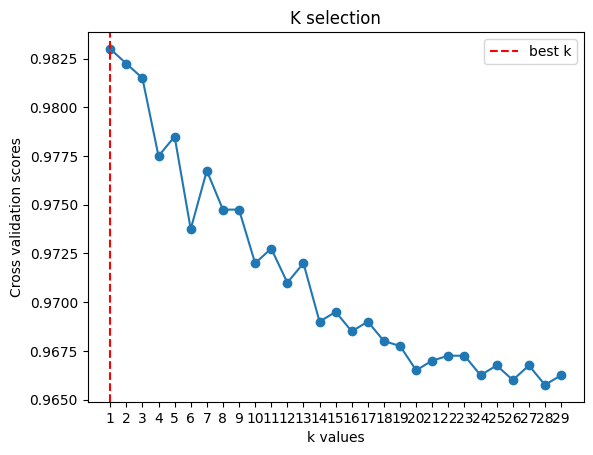

In [265]:
# Graph of Cross validation scores with k values

plt.plot(k_values, cv_scores, '-o')
plt.xlabel('k values')
plt.ylabel('Cross validation scores')
plt.title('K selection')
plt.xticks(k_values)
plt.axvline(x=best_k, color='r', linestyle='--', label='best k')
plt.legend()
plt.show()

In [266]:

best_model=grid_search.best_estimator_
# Prediction on train set
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

# # Prediction on test set
y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(" Accuracy on train: {:.2f}%".format(accuracy_train * 100))
print("Accuracy on test : {:.2f}%".format(accuracy_test * 100))

 Accuracy on train: 99.98%
Accuracy on test : 99.20%


This model has a better accuracy 99.2% on our test set than logistic regression 99.0% and our Random Forest Model 99.0%

## 4.4 SVM Model

In [267]:
from sklearn.svm import SVC
# SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

SVC()

In [269]:
# Predictions on train and test set
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

In [270]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Evaluation metrics on train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, svm_model.decision_function(X_train))

In [271]:
# Evaluation metrics on test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, svm_model.decision_function(X_test))

In [272]:
# Results
evaluation_table = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1_score, train_auc],
    'Test': [test_accuracy, test_precision, test_recall, test_f1_score, test_auc]
})

# Performance table
print(evaluation_table)

     Metrics     Train      Test
0   Accuracy  0.983250  0.989000
1  Precision  0.978261  0.989583
2     Recall  0.840000  0.904762
3   F1 Score  0.903874  0.945274
4        AUC  0.990580  0.993711


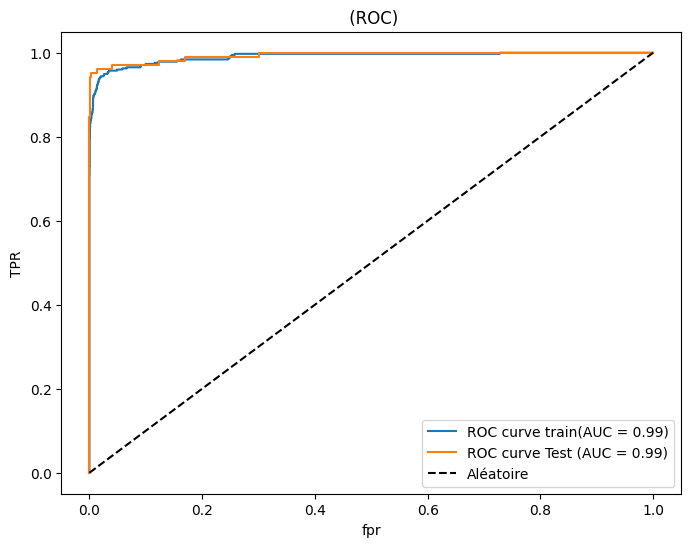

In [273]:
#  ROC curve for train and test set

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, svm_model.decision_function(X_train))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, svm_model.decision_function(X_test))

# AUC for train and test set
auc_train = roc_auc_score(y_train, svm_model.decision_function(X_train))
auc_test = roc_auc_score(y_test, svm_model.decision_function(X_test))

# Display the graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='ROC curve train(AUC = {:.2f})'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='ROC curve Test (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlabel('fpr')
plt.ylabel('TPR')
plt.title(' (ROC)')
plt.legend(loc='lower right')
plt.show()

This model has also very good parameters and can be trustful to make our predictions but can be optimized with c and gamma

### b-Optimized model

In [276]:

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Initialize SVM model
svm = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


In [277]:
# Train the new SVM model with the best parameters
svm_best = SVC(**best_params, probability=True)
svm_best.fit(X_train, y_train)

SVC(C=100, degree=2, gamma='auto', probability=True)

In [279]:
# Predictions on train and test set
y_train_pred = svm_best.predict(X_train)
y_test_pred = svm_best.predict(X_test)

In [280]:
# Evaluation metrics on train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, svm_best.decision_function(X_train))

# Evaluation metrics on test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, svm_best.decision_function(X_test))

# Results 2
evaluation_table2 = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1_score, train_auc],
    'Test': [test_accuracy, test_precision, test_recall, test_f1_score, test_auc]
})

# Performance table
print(evaluation_table2)

     Metrics     Train      Test
0   Accuracy  0.986750  0.992000
1  Precision  0.973529  0.989899
2     Recall  0.882667  0.933333
3   F1 Score  0.925874  0.960784
4        AUC  0.995638  0.996212


This model has a better metrics on Test set than the first one

In [281]:
# Save the model

joblib.dump(svm_model, "svm_best.pkl")  

['svm_best.pkl']

### c-API for SVM model

In [282]:
# Save the model

joblib.dump(svm_model, "svm_best.pkl")  

# Load the saved SVM model
svm_model = joblib.load("svm_best.pkl")

# Initialize Flask app
app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()  # Receive JSON input
    features = np.array(data["features"]).reshape(1, -1)  # Format input for prediction

    prediction = svm_model.predict(features)[0]  # Get prediction
    probability = svm_model.predict_proba(features)[0].tolist()  # Get probability scores

    return jsonify({"prediction": int(prediction), "probabilities": probability})

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\Yves-Ricky\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
